In [8]:
import pandas as pd
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


from utils import read_product_delivery

In [2]:
df = read_product_delivery()
df.head()

,order_id,product_id,quantity,seller_id,price,freight_value,product_category_name,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,2017-09-13 08:59:02,6 days 09:35:14,1 days 05:09:32,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,2017-04-26 10:53:06,8 days 03:41:54,8 days 01:29:24,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,2018-01-14 14:33:31,1 days 22:03:17,6 days 00:42:28,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,2018-08-08 10:00:35,2 days 03:27:25,4 days 00:04:39,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,2017-02-04 13:57:51,11 days 19:48:18,13 days 06:56:22,25 days 02:44:40


In [13]:
df['delivery_days'] = df['total_delivery_time'].dt.days

In [3]:
priority_sellers = ['7c67e1448b00f6e969d365cea6b010ab', '85d9eb9ddc5d00ca9336a2219c97bb13', '1f50f920176fa81dab994f9023523100']

In [14]:
sdf = df[df['seller_id'] == '7c67e1448b00f6e969d365cea6b010ab']
sdf.describe()

,quantity,price,freight_value,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time,delivery_days
count,1002.000000,1002.000000,1002.000000,1002,1002,1002,1002,1002.000000
mean,2.156687,141.578333,38.150220,2017-11-25 05:15:30.114770688,11 days 21:39:43.069860279,10 days 10:04:09.682634730,22 days 07:43:52.752495010,21.860279
min,1.000000,29.990000,0.060000,2017-01-26 22:44:11,0 days 17:00:17,0 days 03:45:53,3 days 23:01:12,3.000000
25%,1.000000,116.600000,22.142500,2017-07-25 03:12:27.750000128,8 days 08:44:37.500000,4 days 03:34:59,15 days 04:20:08.750000,15.000000
50%,1.000000,139.990000,34.160000,2017-12-12 06:36:24.500000,11 days 08:22:18.500000,7 days 05:13:36.500000,19 days 19:06:18,19.000000
75%,1.000000,169.990000,49.292500,2018-03-20 15:31:14.500000,14 days 18:43:47.250000,13 days 05:28:36.500000,26 days 03:05:50.250000,26.000000
max,40.000000,401.340000,193.390000,2018-08-07 18:58:53,43 days 01:51:57,181 days 23:45:15,186 days 05:40:57,186.000000
std,3.735565,46.347256,21.117926,NaN,5 days 03:11:31.957182918,10 days 23:20:05.303807441,12 days 03:06:24.665622181,12.146312


There are very huge number both in delivered_carrier_time, carrier_to_customer_time.
There seems to have related with product category or freight_value.

In [9]:
def freight_value(df):
    lower_bound = df['freight_value'].quantile(0.25)
    upper_bound = df['freight_value'].quantile(0.75)
    
    conditions = [
            df['freight_value'] < lower_bound,
            df['freight_value'] > upper_bound
        ]
    choices = ["Light", "Heavy"]
    df['category'] = np.select(conditions, choices, default="Normal")
    return df

In [15]:
sdf = freight_value(sdf.copy())
sdf.head()

,order_id,product_id,quantity,seller_id,price,freight_value,product_category_name,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time,delivery_days,category
21,000f25f4d72195062c040b12dce9a18a,1c05e0964302b6cf68ca0d15f326c6ba,1,7c67e1448b00f6e969d365cea6b010ab,119.99,44.40,moveis_escritorio,2018-03-07 10:33:13,9 days 05:25:18,6 days 00:53:21,15 days 06:18:39,15,Normal
88,0036757472ece3dde52fd4bfd929c90e,4c1bbc12438daec98a77243c2bf7a3ba,1,7c67e1448b00f6e969d365cea6b010ab,136.99,66.04,moveis_escritorio,2018-07-19 14:58:59,18 days 16:46:01,2 days 06:48:40,20 days 23:34:41,20,Heavy
112,00471463a6106056c1a2a809f70de640,9df0e8a7eef2a38b74e6d5c0e224b11f,1,7c67e1448b00f6e969d365cea6b010ab,179.99,85.97,moveis_decoracao,2017-09-21 22:00:44,12 days 16:44:31,7 days 21:44:44,20 days 14:29:15,20,Heavy
244,00ace652c8a5072670f30674e5f19844,aba86c093ccdbac75b09111d57e50004,1,7c67e1448b00f6e969d365cea6b010ab,116.60,30.66,moveis_escritorio,2018-01-19 00:35:45,12 days 16:08:20,19 days 00:28:43,31 days 16:37:03,31,Normal
337,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,1,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,moveis_escritorio,2017-05-16 15:05:35,6 days 19:42:22,1 days 23:47:38,8 days 19:30:00,8,Light


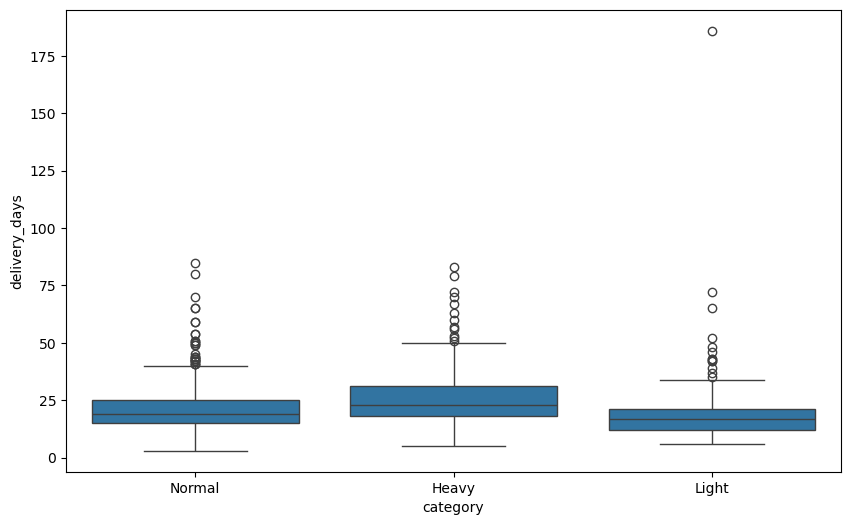

In [16]:
fig, ax = plt.subplots(figsize=(10, 6)) #

sns.boxplot(x='category',  y='delivery_days', data=sdf, ax = ax)
plt.show()

In [17]:
sdf['product_category_name'].value_counts()

product_category_name
moveis_escritorio    906
moveis_decoracao      67
esporte_lazer         14
moveis_sala            9
automotivo             3
bebes                  3
Name: count, dtype: int64

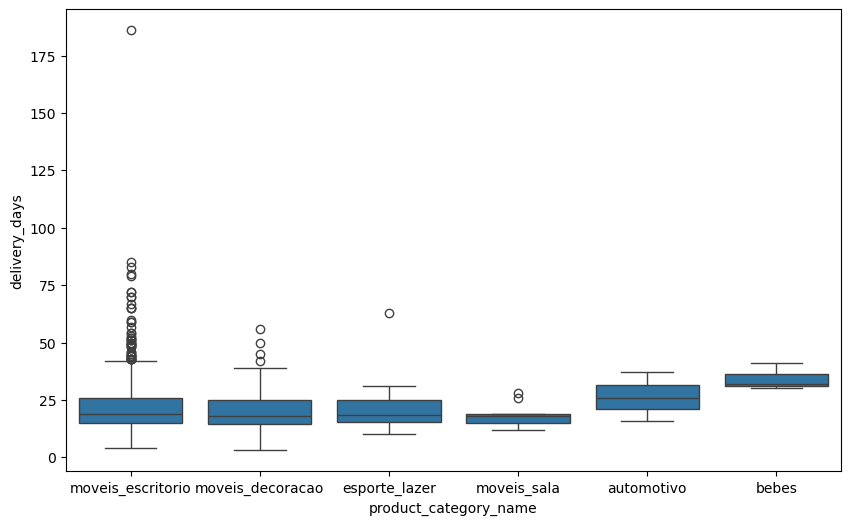

In [18]:
fig, ax = plt.subplots(figsize=(10, 6)) #
df['delivery_days'] = df['total_delivery_time'].dt.days
sns.boxplot(x='product_category_name',  y='delivery_days', data=sdf, ax = ax)
plt.show()

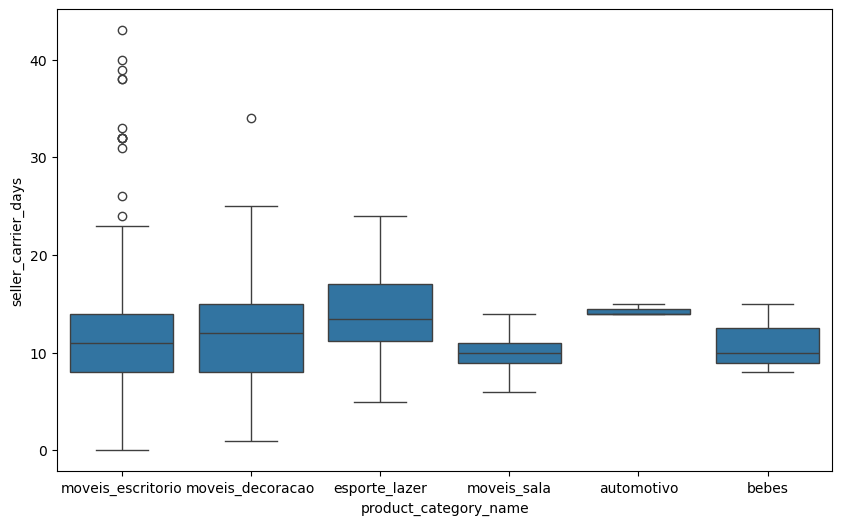

In [23]:
fig, ax = plt.subplots(figsize=(10, 6)) #
	
sdf['seller_carrier_days'] = sdf['delivered_carrier_time'].dt.days
sns.boxplot(x='product_category_name',  y='seller_carrier_days', data=sdf, ax = ax)
plt.show()

In [19]:
sdf[sdf['delivery_days'] > 100]

,order_id,product_id,quantity,seller_id,price,freight_value,product_category_name,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time,delivery_days,category
87613,dfe5f68118c2576143240b8d78e5940a,aba86c093ccdbac75b09111d57e50004,1,7c67e1448b00f6e969d365cea6b010ab,119.6,16.54,moveis_escritorio,2017-03-17 12:32:22,4 days 05:55:42,181 days 23:45:15,186 days 05:40:57,186,Light


In [20]:
sdf.sort_values(by='quantity', ascending=False)

,order_id,product_id,quantity,seller_id,price,freight_value,product_category_name,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time,delivery_days,category
44414,71dab1155600756af6de79de92e712e3,308e4e21ae228a10f6370a243ae59995,40,7c67e1448b00f6e969d365cea6b010ab,76.99,40.69,moveis_escritorio,2018-02-01 18:32:02,18 days 00:05:33,21 days 00:20:46,39 days 00:26:19,39,Normal
74259,be382a9e1ed25128148b97d6bfdb21af,6dde44b4172999f35f08654d06bad633,36,7c67e1448b00f6e969d365cea6b010ab,194.99,59.91,moveis_escritorio,2017-11-04 17:29:15,16 days 20:53:13,2 days 06:06:18,19 days 02:59:31,19,Heavy
60067,9aec4e1ae90b23c7bf2d2b3bfafbd943,47920da896bbd89e851429c78a7a7a8b,30,7c67e1448b00f6e969d365cea6b010ab,179.99,0.08,moveis_escritorio,2017-10-02 15:49:23,7 days 05:44:11,1 days 19:38:20,9 days 01:22:31,9,Light
44415,71dab1155600756af6de79de92e712e3,90b58782fdd04cb829667fcc41fb65f5,26,7c67e1448b00f6e969d365cea6b010ab,179.99,76.50,moveis_escritorio,2018-02-01 18:32:02,18 days 00:05:33,21 days 00:20:46,39 days 00:26:19,39,Heavy
60066,9aec4e1ae90b23c7bf2d2b3bfafbd943,0db4869ac8a908414823d44d742f5ba3,25,7c67e1448b00f6e969d365cea6b010ab,199.99,88.57,moveis_escritorio,2017-10-02 15:49:23,7 days 05:44:11,1 days 19:38:20,9 days 01:22:31,9,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37205,5fa31572cddd9405f1eda482f8106353,2a5806f10d0f00e5ad032dd2e3c8806e,1,7c67e1448b00f6e969d365cea6b010ab,169.99,25.70,moveis_escritorio,2017-07-09 14:55:28,4 days 05:38:00,14 days 20:41:28,19 days 02:19:28,19,Normal
37317,5fe9874b96028c851e35c1c28aede4c2,eab67bf937aaadc19f83383a331d2dd9,1,7c67e1448b00f6e969d365cea6b010ab,149.99,17.78,moveis_escritorio,2018-01-14 14:39:38,10 days 02:20:16,5 days 21:19:54,15 days 23:40:10,15,Light
37350,6002f27b7795af4f2bd4da90aca5a958,8ed094bfe076c568f6bb10feada3f75d,1,7c67e1448b00f6e969d365cea6b010ab,179.90,39.46,moveis_escritorio,2018-05-31 10:13:38,15 days 04:11:22,5 days 01:21:28,20 days 05:32:50,20,Normal
37531,6078670865b8c6c400f6f7cdafd0d04d,3eef0cb94ba82de806bb30ab743c7655,1,7c67e1448b00f6e969d365cea6b010ab,79.99,14.52,moveis_escritorio,2018-04-18 11:53:39,6 days 20:20:21,1 days 13:27:43,8 days 09:48:04,8,Light


In [25]:
sdf[sdf['seller_carrier_days'] > 20]['quantity'].describe()

count    35.000000
mean      2.857143
std       3.647262
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max      15.000000
Name: quantity, dtype: float64